# Pandas
The Pandas library provides high-performance, easy-to-use data structures and analysis tools for tabular data

In [1]:
# Standard way to import the Pandas library
import pandas as pd

# Usually used together with NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a Pandas series from array
f1 = 1
x1 = np.linspace(0, 1, 11)
y1 = np.sin(2 * np.pi * f1 * x1)

# Create a series
signal1 = pd.Series(y1, name='y1')
print(signal1) 

0     0.000000e+00
1     5.877853e-01
2     9.510565e-01
3     9.510565e-01
4     5.877853e-01
5     1.224647e-16
6    -5.877853e-01
7    -9.510565e-01
8    -9.510565e-01
9    -5.877853e-01
10   -2.449294e-16
Name: y1, dtype: float64


In [3]:
# Use timedelta to the Series
signal1.index = pd.to_timedelta(x1, unit='s')
print(signal1)

0 days 00:00:00           0.000000e+00
0 days 00:00:00.100000    5.877853e-01
0 days 00:00:00.200000    9.510565e-01
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:01          -2.449294e-16
Name: y1, dtype: float64


## # Select data by index value

In [4]:
# Just like a dictionary
print(signal1['0.5s'])

# Or by index position--like an array
print(signal1[5])

1.2246467991473532e-16
1.2246467991473532e-16


## Resample data

In [5]:
# Up-sampling
signal2 = signal1.resample('50ms').interpolate(method='linear')
print(signal2)

0 days 00:00:00           0.000000e+00
0 days 00:00:00.050000    2.938926e-01
0 days 00:00:00.100000    5.877853e-01
0 days 00:00:00.150000    7.694209e-01
0 days 00:00:00.200000    9.510565e-01
0 days 00:00:00.250000    9.510565e-01
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.350000    7.694209e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.450000    2.938926e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.550000   -2.938926e-01
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.650000   -7.694209e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.750000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.850000   -7.694209e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:00.950000   -2.938926e-01
0 days 00:00:01          -2.449294e-16
Freq: 50L, Name: y1, dtype: float64


In [6]:
# Down-sampling
signal3 = signal1.resample('200ms').asfreq()
print(signal3)

0 days 00:00:00           0.000000e+00
0 days 00:00:00.200000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:01          -2.449294e-16
Freq: 200L, Name: y1, dtype: float64


## Invalid/Missing data can be easily filled with values

In [7]:
# Create invalid data
signal1[1:3] = np.NaN
print(signal1)

0 days 00:00:00           0.000000e+00
0 days 00:00:00.100000             NaN
0 days 00:00:00.200000             NaN
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:01          -2.449294e-16
Name: y1, dtype: float64


In [8]:
# Now fill it in with zeros
signal1 = signal1.fillna(0)
# equivalently, 
# step_counts.fillna(0., inplace=True)

print(signal1)

0 days 00:00:00           0.000000e+00
0 days 00:00:00.100000    0.000000e+00
0 days 00:00:00.200000    0.000000e+00
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:01          -2.449294e-16
Name: y1, dtype: float64


## Pandas DataFrame

In [9]:
# Create DataFrame from NumPy arrays
f1, f2 = 0.5, 1
x = np.linspace(0, 1, 11)
y1 = np.sin(2 * np.pi * f1 * x)
y2 = np.sin(2 * np.pi * f2 * x)

print(y1)
print(y2)

[0.00000000e+00 3.09016994e-01 5.87785252e-01 8.09016994e-01
 9.51056516e-01 1.00000000e+00 9.51056516e-01 8.09016994e-01
 5.87785252e-01 3.09016994e-01 1.22464680e-16]
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16]


In [10]:
# Create DataFrame
df = pd.DataFrame(data={'y1':y1, 'y2':y2})
print(df)
df.index = pd.to_timedelta(x, unit='s')
print(df)

              y1            y2
0   0.000000e+00  0.000000e+00
1   3.090170e-01  5.877853e-01
2   5.877853e-01  9.510565e-01
3   8.090170e-01  9.510565e-01
4   9.510565e-01  5.877853e-01
5   1.000000e+00  1.224647e-16
6   9.510565e-01 -5.877853e-01
7   8.090170e-01 -9.510565e-01
8   5.877853e-01 -9.510565e-01
9   3.090170e-01 -5.877853e-01
10  1.224647e-16 -2.449294e-16
                                  y1            y2
0 days 00:00:00         0.000000e+00  0.000000e+00
0 days 00:00:00.100000  3.090170e-01  5.877853e-01
0 days 00:00:00.200000  5.877853e-01  9.510565e-01
0 days 00:00:00.300000  8.090170e-01  9.510565e-01
0 days 00:00:00.400000  9.510565e-01  5.877853e-01
0 days 00:00:00.500000  1.000000e+00  1.224647e-16
0 days 00:00:00.600000  9.510565e-01 -5.877853e-01
0 days 00:00:00.700000  8.090170e-01 -9.510565e-01
0 days 00:00:00.800000  5.877853e-01 -9.510565e-01
0 days 00:00:00.900000  3.090170e-01 -5.877853e-01
0 days 00:00:01         1.224647e-16 -2.449294e-16


## DataFrame rows can be indexed by row using the 'loc' and 'iloc' methods

In [11]:
# Select row of data by index name
print(df.loc['0.8s'])

y1    0.587785
y2   -0.951057
Name: 0 days 00:00:00.800000, dtype: float64


In [12]:
# Select row of data by integer position
print(df.iloc[-3])

y1    0.587785
y2   -0.951057
Name: 0 days 00:00:00.800000, dtype: float64


## DataFrame columns can be indexed by row using 'loc' and 'iloc' methods

In [13]:
# Dictionary approach
print(df['y2'])

0 days 00:00:00           0.000000e+00
0 days 00:00:00.100000    5.877853e-01
0 days 00:00:00.200000    9.510565e-01
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:01          -2.449294e-16
Name: y2, dtype: float64


In [14]:
# First column (Column 1)
print(df.iloc[:,1])

0 days 00:00:00           0.000000e+00
0 days 00:00:00.100000    5.877853e-01
0 days 00:00:00.200000    9.510565e-01
0 days 00:00:00.300000    9.510565e-01
0 days 00:00:00.400000    5.877853e-01
0 days 00:00:00.500000    1.224647e-16
0 days 00:00:00.600000   -5.877853e-01
0 days 00:00:00.700000   -9.510565e-01
0 days 00:00:00.800000   -9.510565e-01
0 days 00:00:00.900000   -5.877853e-01
0 days 00:00:01          -2.449294e-16
Name: y2, dtype: float64


## Pandas has built-in methods that simplify creating visualizations from DataFrame and Series

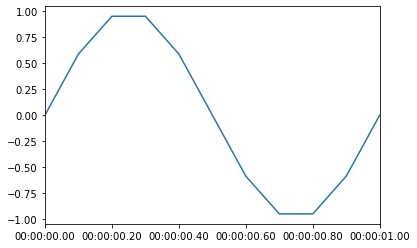

In [15]:
# plot the Series
signal2.plot()
plt.show()

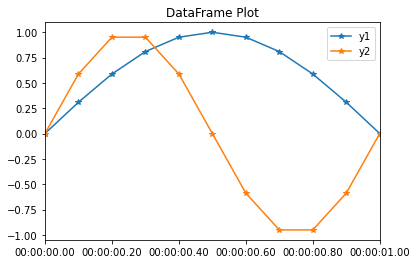

In [16]:
# plot the DataFrame
df.plot(marker='*', title='DataFrame Plot')
plt.show()

## CSV and other common filetypes can be read with a single command

In [17]:
# The location of the data file
filepath = 'data/iris_data.csv'

# Import the data
data = pd.read_csv(filepath)

# Print a few rows 
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Using the groupby method calculated aggregated DataFrame statistics.

In [18]:
# Use the size method with a 
# DataFrame to get count
# For a Series, use the .value_counts 
# method
group_sizes = (data.groupby('species').size())

print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Pandas contains a variety of statistical methods — mean, median, mode, standard deviation etc.

In [19]:
# Mean calculated on a DataFrame
print(data.mean())

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


C:\Users\wooihaw\AppData\Local\Temp\ipykernel_15680\4024397745.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


In [20]:
# Median calculated on a Series
print(data.petal_length.median())

4.35


In [21]:
# Mode calculated on a Series
print(data.petal_length.mode())

0    1.5
Name: petal_length, dtype: float64


In [22]:
# Standard dev, and variance on a series 
print(data.petal_length.std(), data.petal_length.var())

1.7644204199522617 3.1131794183445156


In [23]:
# Multiple statisccal calculations can be presented in a DataFrame
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Data can be assigned to a DataFrame column

In [24]:
# Create a new column that is a product 
# of both measurements
data['sepal_area'] = data.sepal_length * data.sepal_width

print(data)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     sepal_area  
0         17.85  
1         14.70  
2         15.04  
3  

## Two DataFrames can be concatenated along either dimension

In [25]:
# Concatenate the first two and the last two rows
first2 = data.iloc[:2]
last2 = data.iloc[-2:]
small_data = pd.concat([first2, last2])
print(small_data)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     sepal_area  
0         17.85  
1         14.70  
148       21.08  
149       17.70  
